In [1]:
# import necessary libraries

import numpy as np
import h5py
import tensorflow as tf

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data from .h5 file

svhn_data = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r') 

# Data pre-processing

In [3]:
svhn_data.keys() # Check the keys in the HDF5 dataset

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
# extract X_train data and convert it into a numpy array

X_train = np.asarray(list(svhn_data['X_train'])) 

In [5]:
X_train.shape

(42000, 32, 32)

In [6]:
# extract X_test data and convert it into a numpy array

X_test = np.asarray(list(svhn_data['X_test'])) 

In [7]:
X_test.shape

(18000, 32, 32)

In [8]:
# extract y_train data and convert it into a numpy array

y_train = np.asarray(list(svhn_data['y_train'])) 

In [9]:
y_train.shape

(42000,)

In [10]:
# extract y_test data and convert it into a numpy array

y_test = np.asarray(list(svhn_data['y_test']))

In [11]:
y_test.shape

(18000,)

# Data visualization

Label: 6


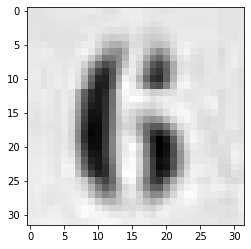

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the training data along with label

print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

Label: 8


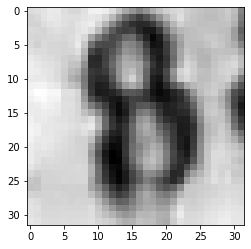

In [13]:
# Visualize the test data along with label

print("Label: {}".format(y_test[10]))
plt.imshow(X_test[10], cmap='gray')

# Neural Network Classifier

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("One value of y_train:", y_train[1])

One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# initialize the session
    
tf.keras.backend.clear_session()

model = Sequential()

#Reshape data from 2D to 1D
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(128))

model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

model.add(Dense(64))

model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

model.add(Dense(32))

model.add(tf.keras.layers.LeakyReLU(0.1)) #LeakyRelu

model.add(Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [17]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, mode='min')
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/50
329/329 [==============================] - 3s 7ms/step - loss: 1.7960 - accuracy: 0.3773 - val_loss: 1.0720 - val_accuracy: 0.6690
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.9914 - accuracy: 0.6930 - val_loss: 0.8670 - val_accuracy: 0.7429
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.8178 - accuracy: 0.7489 - val_loss: 0.8084 - val_accuracy: 0.7554
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.7852 - accuracy: 0.7596 - val_loss: 0.7444 - val_accuracy: 0.7779
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.6895 - accuracy: 0.7849 - val_loss: 0.7578 - val_accuracy: 0.7756
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.6478 - accuracy: 0.7984 - val_loss: 0.6941 - val_accuracy: 0.7986
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.6194 - accuracy: 0.8101 - val_loss: 0.7023 - val_accuracy: 0.7985
Epoch 

In [18]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 937us/step - loss: 0.6036 - accuracy: 0.8349


[0.603589653968811, 0.8348888754844666]

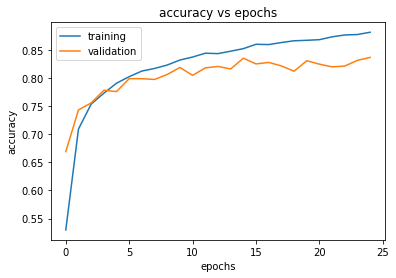

In [24]:
# Plot training accuracy and validation accuracy vc no. of epochs

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

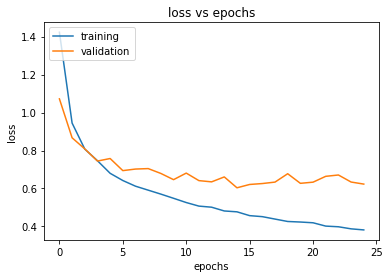

In [23]:
# Plot training loss and validation loss vc no. of epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()